In [8]:
import numpy as np
from Utils.discrete_family import discrete_family
from Utils.barrier_affine import solve_barrier_tree, solve_barrier_tree_nonneg, solve_barrier_tree_box_PGD
from CART import RegressionTree
from scipy.interpolate import interp1d
from scipy.stats import multivariate_normal as mvn
from Utils.plotting import  *
from Utils.simulation_helpers import *

In [19]:
n = 100
p = 10
X = np.random.normal(size=(n, p))
a = 1
b = 1

mu = b * ((X[:, 0] <= 0) * (1 + a * (X[:, 1] > 0) + (X[:, 2] * X[:, 1] <= 0)))
sd = 1.
noise_sd = 0.5
y = mu + np.random.normal(size=(n,), scale=sd)

In [20]:
reg_tree = RegressionTree(min_samples_split=25, max_depth=3,
                              min_proportion=0., min_bucket=10)
reg_tree.fit(X, y, sd = 1)

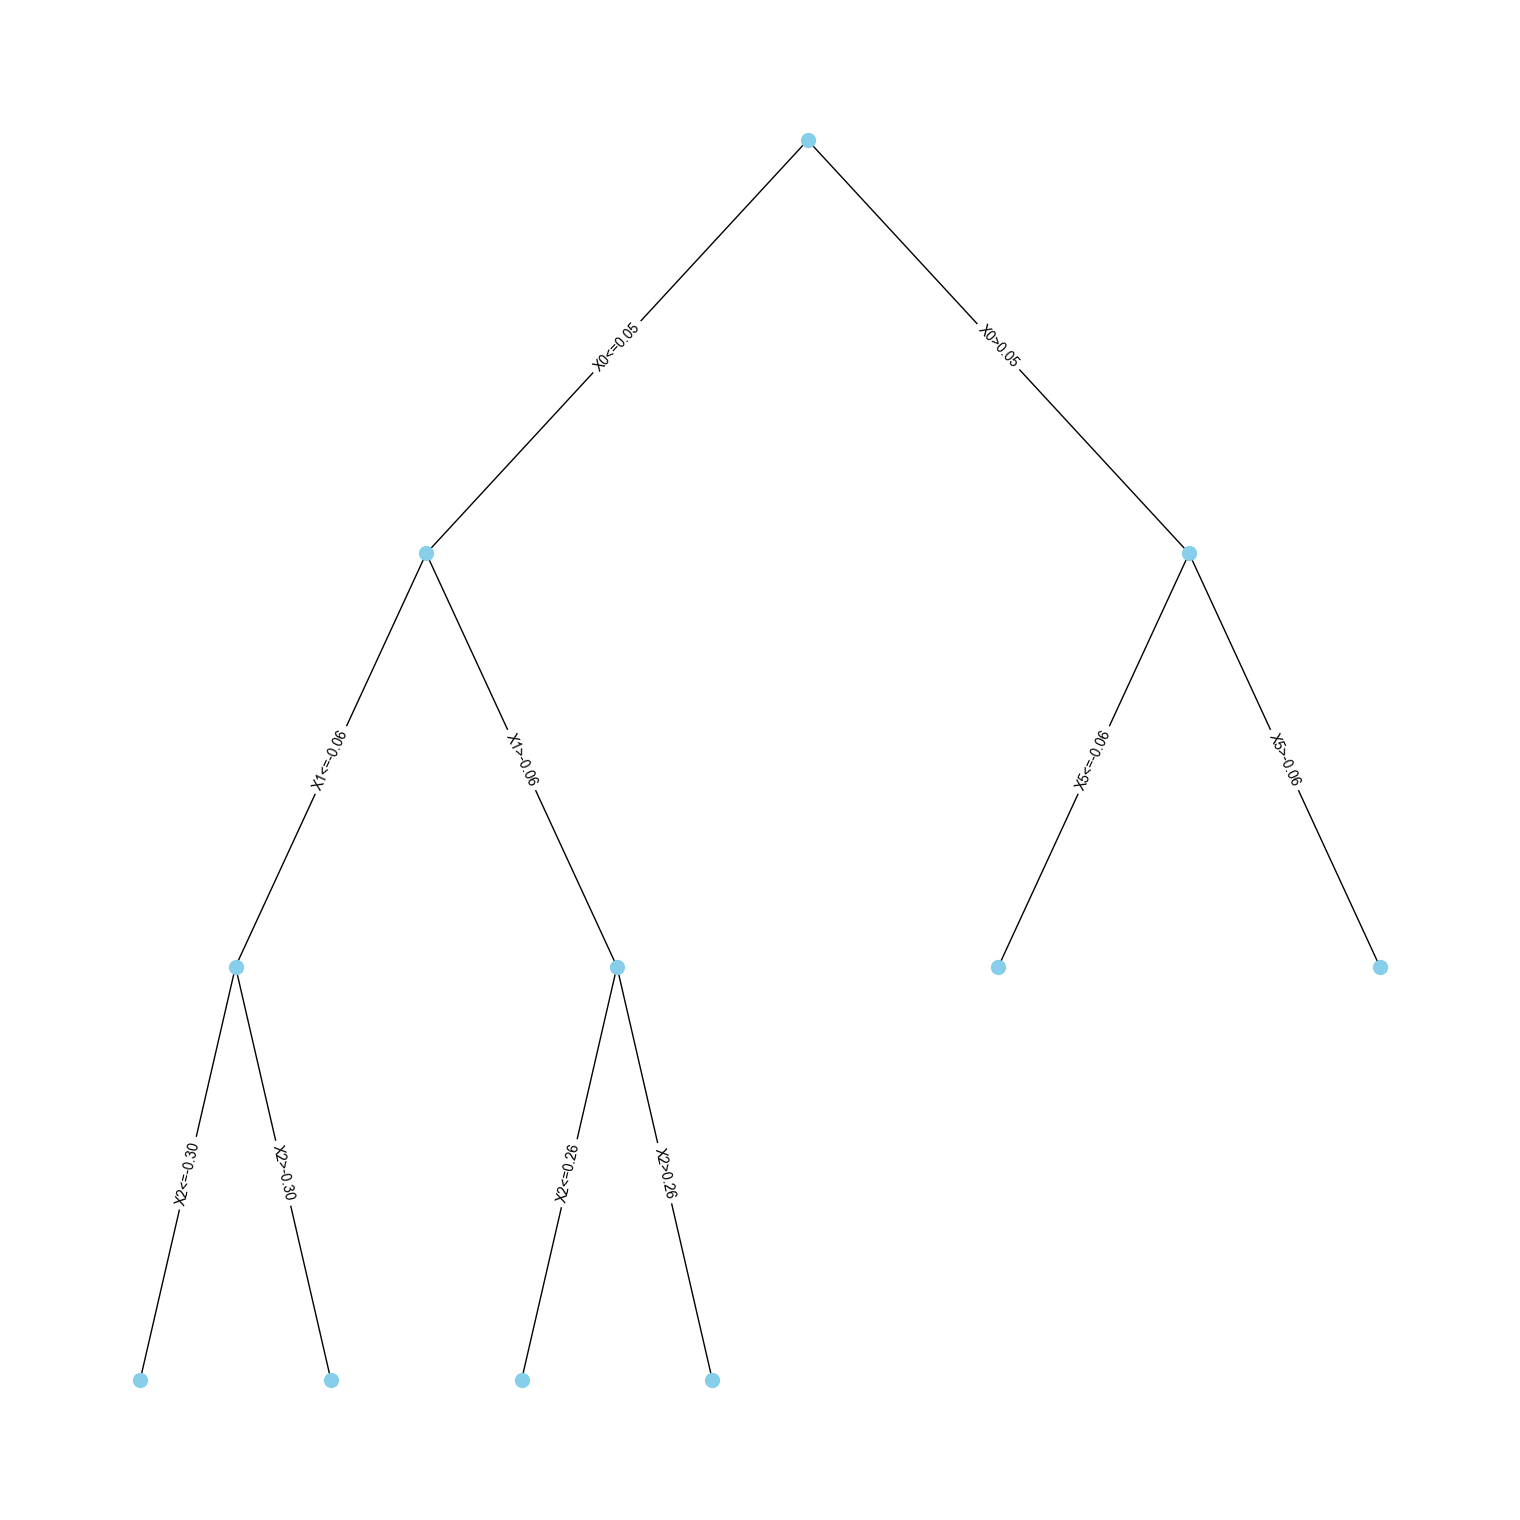

In [24]:
draw_tree(reg_tree.root)

In [25]:
def terminal_splits(tree, level=0.1, sd_y=1):
    for node in tree.terminal_parents:
        pivot, dist, contrast, norm_contrast, obs_tar, logW, suff, sel_probs = (
            tree.condl_split_inference(node=node,
                                       ngrid=10000,
                                       ncoarse=200,
                                       grid_w_const=2.5,
                                       reduced_dim=1,
                                       sd=sd_y,
                                       use_cvxpy=True))
        print(node)
        print(node.feature_index)
        print(node.threshold)
        print(pivot)
        

In [26]:
terminal_splits(reg_tree)

2
-0.30474427422446754
0.9996983310334507
2
0.2565307920267181
0.011146069290485599
5
-0.06015494477390453
0.9504595467621357
